In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimension de x : (100, 2)
dimension de y : (100, 1)


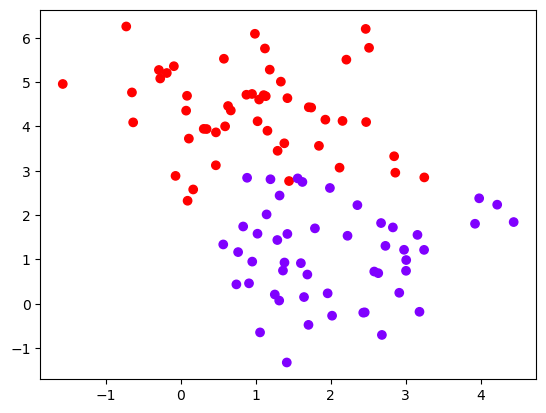

In [27]:
x,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y=y.reshape((y.shape[0],1))
print('dimension de x :',x.shape)
print('dimension de y :',y.shape)

plt.scatter(x[:,0],x[:,1],c=y ,cmap='rainbow_r')
plt.show()

In [28]:
def initialisation (x):
    w=np.random.randn(x.shape[1],1)
    b=np.random.randn(1)
    return (w,b)

In [29]:
def model(x,w,b):
    z=x.dot(w)+b
    a=1/(1+np.exp(-z))
    return a

In [30]:
def log_loss(y,a) :   
    l= 1 / len(y) * np.sum(-y*np.log(a)-(1-y) * np.log(1-a))
    return l

In [31]:
def gradient(x,a,y):
    dW =1/len(y) * np.dot(x.T,(a-y))
    db =1/len(y) * np.sum((a-y))
    return (dW,db)
    

In [32]:
def update(dw,db,w,b,learning_rate):
    w=w-learning_rate*dw
    b=b-learning_rate*db
    return (w,b)

In [33]:
def predict(x,w,b):
    a=model(x,w,b)
    return a>=0.5

In [34]:
def artificial_neuron(x,y,learning_rate=0.1,n_iter=100):
    w,b=initialisation (x)
    loss=[]
   
    for i in range(0,n_iter):              
        a=model(x,w,b)        
        loss.append(log_loss(x,a))
        dw,db=gradient(x,a,y)
        w,b =update(dw,db,w,b,learning_rate)
    y_pred=predict(x,w,b)
    print(accuracy_score(y,y_pred))
   
    plt.plot(loss)
    plt.show
    return (w,b)

0.92


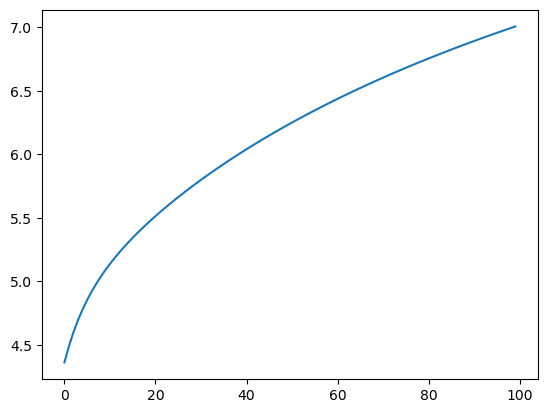

In [35]:
w,b=artificial_neuron(x,y)

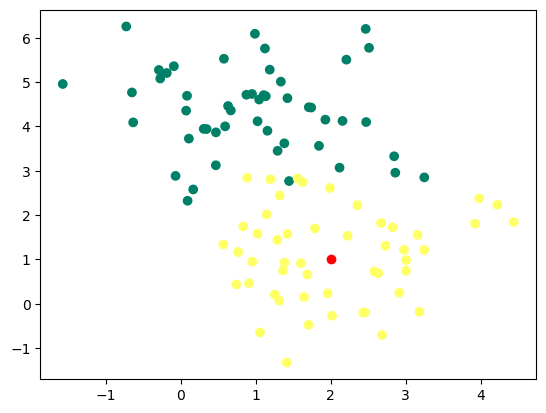

array([ True])

In [39]:
new_plant=np.array([2,1])
plt.scatter(x[:,0],x[:,1],c=y,cmap='summer')
plt.scatter(new_plant[0],new_plant[1],c='r')
plt.show()
predict(new_plant,w,b)

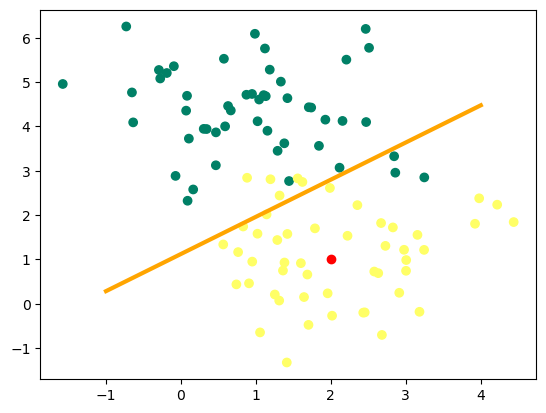

array([ True])

In [41]:
x0=np.linspace(-1,4,100)
x1=(-w[0]*x0-b)/w[1]
plt.scatter(x[:,0],x[:,1],c=y,cmap='summer')
plt.scatter(new_plant[0],new_plant[1],c='r')
plt.plot(x0,x1,c='orange',lw=3)
plt.show()
predict(new_plant,w,b)

In [46]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d( 
    x=x[:, 0].flatten(),
    y=x[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

X0 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
X1 = np.linspace(x[:, 1].min(), x[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = w[0] * xx0 + w[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=x[:, 0].flatten(), y=x[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

